# 期末作业:能源强度影响因素探究

2016200601 刘昕雅

In [77]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools
import matplotlib.pyplot as plt
import seaborn
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import coint
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
plt.rcParams["font.sans-serif"]="SimHei"
plt.rcParams["axes.unicode_minus"]=False

## 1.数据预处理

In [78]:
energy=pd.read_csv("Energy.csv")

数据处理

In [79]:
#剔除通货膨胀的影响
energy["real GDP"]=energy["GDP"]/energy["index"]
#计算能源强度（能源总量/实际GDP)
energy["energy intensity"]=energy["energy consumption"]/energy["real GDP"]
#计算能源结构(煤炭消费量/能源消费量)
energy["energy structure"]=energy["coal consumption"]/energy["energy consumption"]

对变量取对数

In [81]:
energy["lenergy intensity"]=np.log(energy["energy intensity"])
energy["lreal GDP"]=np.log(energy["real GDP"])
enZergy["lpopulation"]=np.log(energy["population"])
energy["lconsumption"]=np.log(energy["consumption"])
energy["lindustrial structure"]=np.log(energy["industrial structure"])
energy["lenergy structure"]=np.log(energy["energy structure"])
energy["lcity rate"]=np.log(energy["city rate"])

## 2.绘制能源消耗量和能源强度的时间变化趋势

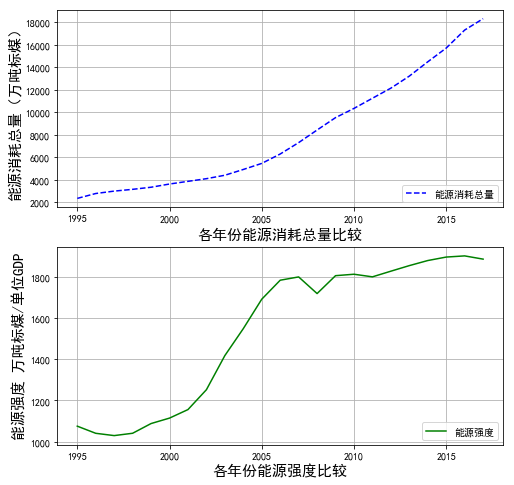

In [83]:
p1=plt.figure(figsize=(8,8))
ax1=p1.add_subplot(2,1,1)
plt.xlabel("各年份能源消耗总量比较",size=15)
plt.ylabel("能源消耗总量（万吨标煤）",size=15)
plt.plot(energy.year,energy["consumption"],"b--")
plt.legend(["能源消耗总量"],loc=4)
plt.grid()
ax2=p1.add_subplot(2,1,2)
plt.xlabel("各年份能源强度比较",size=15)
plt.ylabel("能源强度 万吨标煤/单位GDP",size=15)
plt.plot(energy.year,energy["energy intensity"],"g-")
plt.legend(["能源强度"],loc=4)
plt.grid()
plt.show()

## 3.时间序列数据平稳性检验

绘制变量的时间序列图像

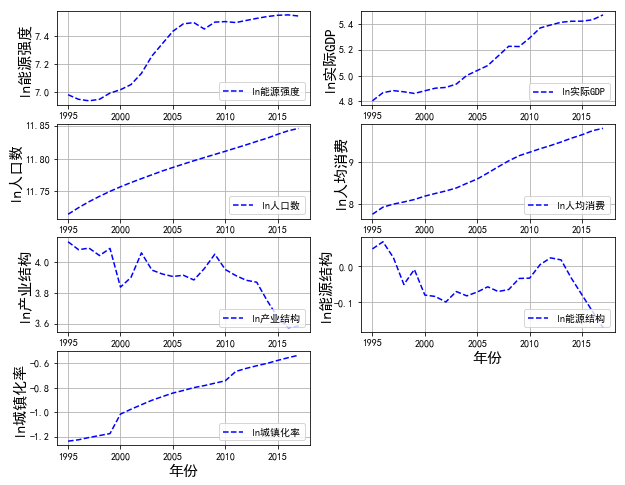

In [87]:
p1=plt.figure(figsize=(10,8))
ax1=p1.add_subplot(4,2,1)
plt.xlabel("年份",size=15)
plt.ylabel("ln能源强度",size=15)
plt.plot(energy.year,energy["lenergy intensity"],"b--")
plt.legend(["ln能源强度"],loc=4)
plt.grid()
ax2=p1.add_subplot(4,2,2)
plt.xlabel("年份",size=15)
plt.ylabel("ln实际GDP",size=15)
plt.plot(energy.year,energy["lreal GDP"],"b--")
plt.legend(["ln实际GDP"],loc=4)
plt.grid()
ax3=p1.add_subplot(4,2,3)
plt.xlabel("年份",size=15)
plt.ylabel("ln人口数",size=15)
plt.plot(energy.year,energy["lpopulation"],"b--")
plt.legend(["ln人口数"],loc=4)
plt.grid()
ax4=p1.add_subplot(4,2,4)
plt.xlabel("年份",size=15)
plt.ylabel("ln人均消费",size=15)
plt.plot(energy.year,energy["lconsumption"],"b--")
plt.legend(["ln人均消费"],loc=4)
plt.grid()
ax5=p1.add_subplot(4,2,5)
plt.xlabel("年份",size=15)
plt.ylabel("ln产业结构",size=15)
plt.plot(energy.year,energy["lindustrial structure"],"b--")
plt.legend(["ln产业结构"],loc=4)
plt.grid()
ax6=p1.add_subplot(4,2,6)
plt.xlabel("年份",size=15)
plt.ylabel("ln能源结构",size=15)
plt.plot(energy.year,energy["lenergy structure"],"b--")
plt.legend(["ln能源结构"],loc=4)
plt.grid()
ax7=p1.add_subplot(4,2,7)
plt.xlabel("年份",size=15)
plt.ylabel("ln城镇化率",size=15)
plt.plot(energy.year,energy["lcity rate"],"b--")
plt.legend(["ln城镇化率"],loc=4)
plt.grid()
plt.show()

对变量进行单位根检验（ADF检验）

ADF检验的原假设为存在一个单位根，时间序列不平稳

备择假设为不存在单位根，时间序列平稳

In [9]:
energy.head()

,year,energy consumption,GDP,index,city rate,consumption,reserch,population,industrial structure,coal consumption,real GDP,energy intensity,energy structure,lenergy intensity,lreal GDP,lpopulation,lconsumption,lindustrial structure,lenergy structure,lcity rate
0,1995,131176,61339.9,502.6,0.2904,2355,404.48,122389,62.2,137677.00,122.045165,1074.815212,1.049559,6.979904,4.804391,11.714960,7.764296,4.130355,0.048370,-1.236496
1,1996,135192,71813.6,552.5,0.2937,2789,509.16,123626,59.1,144734.46,129.979367,1040.103546,1.070585,6.947076,4.867376,11.725016,7.933438,4.079231,0.068205,-1.225196
2,1997,135909,79715.0,603.5,0.2992,3002,551.12,124761,59.7,139248.26,132.087821,1028.929079,1.024570,6.936274,4.883467,11.734155,8.007034,4.089332,0.024273,-1.206643
3,1998,136184,85195.5,650.8,0.3040,3159,678.91,125786,56.9,129492.20,130.908881,1040.296110,0.950862,6.947261,4.874502,11.742337,8.058011,4.041295,-0.050386,-1.190728
4,1999,140569,90564.4,700.7,0.3089,3346,896.00,126743,59.6,139336.50,129.248466,1087.587378,0.991232,6.991717,4.861737,11.749917,8.115521,4.087656,-0.008807,-1.174738


In [10]:
print(ts.adfuller(energy["lenergy intensity"], 1,regresults=True))
print(ts.adfuller(energy["lreal GDP"], 1,regresults=True))
print(ts.adfuller(energy["lpopulation"], 1,regresults=True))
print(ts.adfuller(energy["lconsumption"], 1,regresults=True))
print(ts.adfuller(energy["lindustrial structure"], 1,regresults=True))
print(ts.adfuller(energy["lenergy structure"], 1,regresults=True))
print(ts.adfuller(energy["lcity rate"], 1,regresults=True))

(-2.015398257303597, 0.2798625785312072, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735C630>)
(0.22332910835585096, 0.9735401142819095, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735C860>)
(-1.300813045617398, 0.628800262276513, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735C860>)
(0.5408568688241575, 0.9860634061270193, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CBA8>)
(-0.8530205597729561, 0.8030496856168985, {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CBA8>)
(-1.1164392292181293, 0.7

检验结果均为拒绝原假设，时间序列不平稳，因此，对变量进行差分处理

## 4.差分处理

对所有变量进行差分处理，并删除空值

In [11]:
dif_energy=energy.diff(periods=1).dropna()

In [12]:
t=[1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

绘制差分后变量与时间关系图

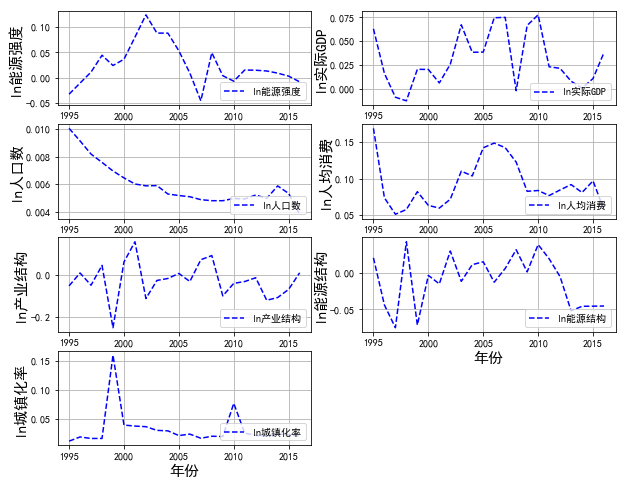

In [88]:
p1=plt.figure(figsize=(10,8))
ax1=p1.add_subplot(4,2,1)
plt.xlabel("年份",size=15)
plt.ylabel("ln能源强度",size=15)
plt.plot(t,dif_energy["lenergy intensity"],"b--")
plt.legend(["ln能源强度"],loc=4)
plt.grid()
ax2=p1.add_subplot(4,2,2)
plt.xlabel("年份",size=15)
plt.ylabel("ln实际GDP",size=15)
plt.plot(t,dif_energy["lreal GDP"],"b--")
plt.legend(["ln实际GDP"],loc=4)
plt.grid()
ax3=p1.add_subplot(4,2,3)
plt.xlabel("年份",size=15)
plt.ylabel("ln人口数",size=15)
plt.plot(t,dif_energy["lpopulation"],"b--")
plt.legend(["ln人口数"],loc=4)
plt.grid()
ax4=p1.add_subplot(4,2,4)
plt.xlabel("年份",size=15)
plt.ylabel("ln人均消费",size=15)
plt.plot(t,dif_energy["lconsumption"],"b--")
plt.legend(["ln人均消费"],loc=4)
plt.grid()
ax5=p1.add_subplot(4,2,5)
plt.xlabel("年份",size=15)
plt.ylabel("ln产业结构",size=15)
plt.plot(t,dif_energy["lindustrial structure"],"b--")
plt.legend(["ln产业结构"],loc=4)
plt.grid()
ax6=p1.add_subplot(4,2,6)
plt.xlabel("年份",size=15)
plt.ylabel("ln能源结构",size=15)
plt.plot(t,dif_energy["lenergy structure"],"b--")
plt.legend(["ln能源结构"],loc=4)
plt.grid()
ax7=p1.add_subplot(4,2,7)
plt.xlabel("年份",size=15)
plt.ylabel("ln城镇化率",size=15)
plt.plot(t,dif_energy["lcity rate"],"b--")
plt.legend(["ln城镇化率"],loc=4)
plt.grid()
plt.show()

对差分后的变量进行单位根检验

In [14]:
print(ts.adfuller(dif_energy["lenergy intensity"], 1,regresults=True))
print(ts.adfuller(dif_energy["lreal GDP"], 1,regresults=True))
print(ts.adfuller(dif_energy["lpopulation"], 1,regresults=True))
print(ts.adfuller(dif_energy["lconsumption"], 1,regresults=True))
print(ts.adfuller(dif_energy["lindustrial structure"], 1,regresults=True))
print(ts.adfuller(dif_energy["lenergy structure"], 1,regresults=True))
print(ts.adfuller(dif_energy["lcity rate"], 1,regresults=True))

(-2.3011288740213036, 0.17160414567060722, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CD68>)
(-3.2958227954406674, 0.015066231328971731, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735C400>)
(-3.1396021405543837, 0.023757915204927448, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CB38>)
(-3.0049866408354937, 0.034431327732475536, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CE48>)
(-5.180235892148061, 9.646773327625408e-06, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, <statsmodels.tsa.stattools.ResultsStore object at 0x0000012A6735CD68>)
(-4.1006684

由于样本较小，误差较大，大致认为所有变量均通过ADF检验，差分后变量时间序列平稳。

## 5.相关性检验

计算相关系数矩阵

In [91]:
#取所需变量
energy2=energy.iloc[0:-1,13:21]
dif_energy2=energy2.diff(periods=1).dropna()
cor=dif_energy2.corr() 
cor

,lenergy intensity,lreal GDP,lpopulation,lconsumption,lindustrial structure,lenergy structure,lcity rate
lenergy intensity,1.000000,-0.245333,-0.205623,-0.283160,0.102031,0.223899,0.076950
lreal GDP,-0.245333,1.000000,-0.208654,0.607362,-0.069636,0.333741,0.051887
lpopulation,-0.205623,-0.208654,1.000000,-0.071351,-0.052092,-0.219384,-0.006190
lconsumption,-0.283160,0.607362,-0.071351,1.000000,0.051352,0.262181,-0.198442
lindustrial structure,0.102031,-0.069636,-0.052092,0.051352,1.000000,0.442259,-0.513086
lenergy structure,0.223899,0.333741,-0.219384,0.262181,0.442259,1.000000,-0.253203
lcity rate,0.076950,0.051887,-0.006190,-0.198442,-0.513086,-0.253203,1.000000


绘制相关系数图

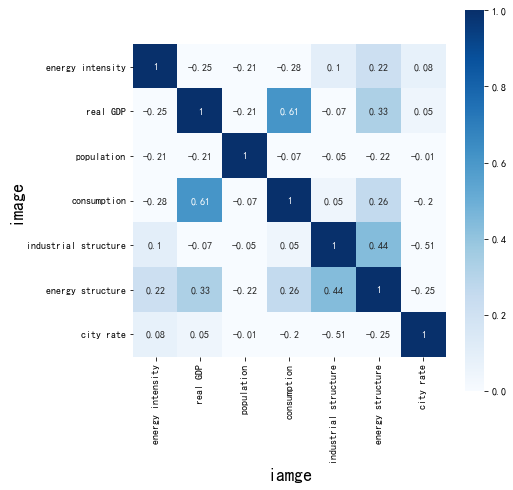

In [90]:
a=cor.values
fig, ax = plt.subplots(figsize = (s,9))
c=["energy intensity","real GDP","population","consumption","industrial structure","energy structure","city rate"]
seaborn.heatmap(pd.DataFrame(np.round(a,2), columns = c,index = c),
                annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="Blues")
ax.set_ylabel('image', fontsize = 18)
ax.set_xlabel('iamge', fontsize = 18) 
plt.show()

绘制相关系数曲线

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


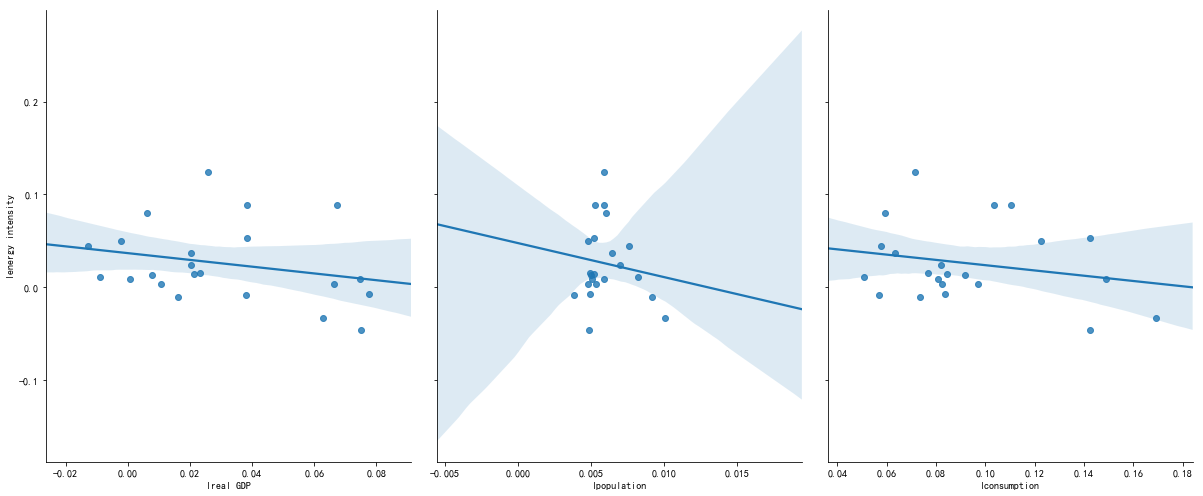

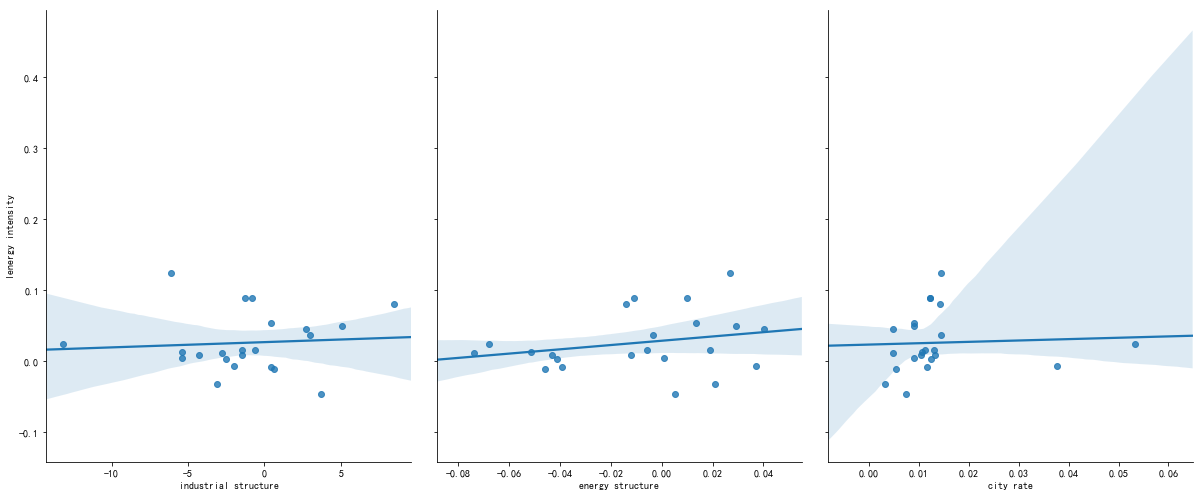

In [17]:
seaborn.pairplot(dif_energy, x_vars=['lreal GDP','lpopulation', "lconsumption"],
                y_vars='lenergy intensity', size=7, aspect=0.8, kind='reg')
seaborn.pairplot(dif_energy, x_vars=["industrial structure" ,"energy structure","city rate"],
                 y_vars='lenergy intensity', size=7, aspect=0.8, kind='reg')
plt.show()

##  6.回归与评价

In [76]:
y=dif_energy["lenergy intensity"]
x1=dif_energy["lreal GDP"]
x2=dif_energy["lpopulation"]
x3=dif_energy["lconsumption"]
x4=dif_energy["lindustrial structure"]
x5=dif_energy["lenergy structure"]
x6=dif_energy["lcity rate"]
x=np.column_stack((x1,x2,x3,x4,x5,x6))
# 线性回归拟合
import statsmodels.api as sm
x_n = sm.add_constant(x) #statsmodels进行回归时，一定要添加此常数项
model = sm.OLS(y, x_n) #model是回归分析模型
results = model.fit() #results是回归分析后的结果
 
#输出回归分析的结果
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)


                            OLS Regression Results                            
Dep. Variable:      lenergy intensity   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.8988
Date:                Sun, 30 Jun 2019   Prob (F-statistic):              0.521
Time:                        13:43:07   Log-Likelihood:                 42.519
No. Observations:                  22   AIC:                            -71.04
Df Residuals:                      15   BIC:                            -63.40
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0790      0.048      1.649      0.1